# Convolutional Neural Network
-  This is a type of artificial neural network designed specifically for processing and analyzing visual data, such as images and videos.  In CNN, every image is represented in the form of an array of pixel values. CNNs have proven to be highly effective in various computer vision tasks, including image classification, object detection, image segmentation, and more. CNN's neurons are arranged like the brain's frontal lobe, the area responsible for processing visual stimuli.
## Convolution Operation:
- This operation involves sliding the filter over the input data and performing element-wise multiplication and summation to compute a response value. The result is stored in a feature map.
- Firstly image is taken as an input and and every image is represented in array of pixel values. W e take 2 arrays and multiply first 3 elements and then we add the values of array which are taken as output of multiplication. Then again next 3 elements of the array is taken and same process is done in one dimensional array.

## How does CNN Recognize an Image:

- ***Filters:***  Imagine you're looking at a picture, and you want to find specific things in that picture, like edges, colors, or shapes. Filters in CNNs are like special glasses you wear to help you find those things.
  

In [24]:
import torch # importing libraries
import torchvision

-  ***Momentum*** is a parameter used in some optimization algorithms to accelerate the convergence of training. Convergence indicates that the model or algorithm has effectively learned from the data or has found the best possible set of parameters to minimize a particular objective (e.g., loss function) or solve a specific task.
-  ***log_interval:*** This variable defines how often (after how many mini-batches) you want to log or display training information. In our code, we are logging information after every 10 mini-batches.
-  ***random_seed:*** Setting a random seed ensures that your results are reproducible. By setting the random seed to 1, you can obtain the same randomization results each time you run your code.
-  ***Disabling the CuDNN backend*** for PyTorch means that you are instructing PyTorch not to use the CuDNN library for GPU acceleration when performing certain deep learning operations.

In [25]:
n_epochs = 30 # defining no of epochs. We have set it to 1, meaning we will train the model for only one epoch.
batch_size_train = 64 #defining batch size for training. It means that the training data will be divided into mini-batches of 64 samples each.
batch_size_test = 1000
learning_rate = 0.01 #  It determines how quickly or slowly the model learns. In our code, we have set it to 0.01.
momentum = 0.5
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

# MNIST Dataset:
The MNIST (Modified National Institute of Standards and Technology) database is a large database of handwritten numbers or digits that are used for training various image processing systems.It contains 60,000 images for training dataset and 10,000 for testing the dataset

***These data loaders are essential for loading and batching the data during the training and testing phases of a machine learning model.***

## Training Data Loader (train_loader)
- It loads the MNIST training dataset.
- The dataset is located in the '/files/' directory, which is the specified root directory.
- ***train=True*** specifies that you are loading the training split of the dataset.
- ***download=True*** will download the dataset from the internet if it's not already present in the specified directory.
- ***transform*** specifies a sequence of data transformations to be applied to each image in the dataset.
- ***shuffle=True*** indicates that the data will be shuffled before each epoch during training.

In [26]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

- ***test loader*** represents like a big box which holds all data.
- The small boxes inside the big box are the individual batches of data, each containing a set of images and their labels.
- The ***enumerate*** function is like having a numbered sticker on each small box.
- ***next(examples)*** is like reaching into the big box, taking out the next small box (with its numbered sticker), and opening it to see what's inside.
- We will have extracted one batch of test data (example_data) and their corresponding labels (example_targets) from the MNIST test dataset. We can use this data to make predictions with our trained machine learning model and evaluate its performance on this batch of test examples.

In [27]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [28]:
example_data.shape # It explains batch size, channel, height, width

torch.Size([1000, 1, 28, 28])

# Plotting Graph:
-  ***plt.subplot(2,3,i+1):*** In subplot 2 and 3 represents number of rows and columns. Matplotlib uses 1-based indexing for subplots" means that when you specify the index of a subplot within a grid of subplots, you should start counting from 1, not 0.
-  ***plt.tight_layout():*** This function is called to ensure that subplots are properly spaced and don't overlap.
- ***plt.imshow(example_data[i][0]***, cmap='gray', interpolation='none'): This line displays the current image (indexed by i) from the example_data tensor. Since these are grayscale images, cmap='gray' is used to display them in grayscale.
- ***plt.title("Ground Truth: {}".format(example_targets[i])):*** It sets the title for the current subplot, indicating the ground truth label for the displayed image.
- ***plt.xticks([]) and plt.yticks([]):*** These lines remove the x and y-axis ticks from the subplot, making the image cleaner without axis labels.

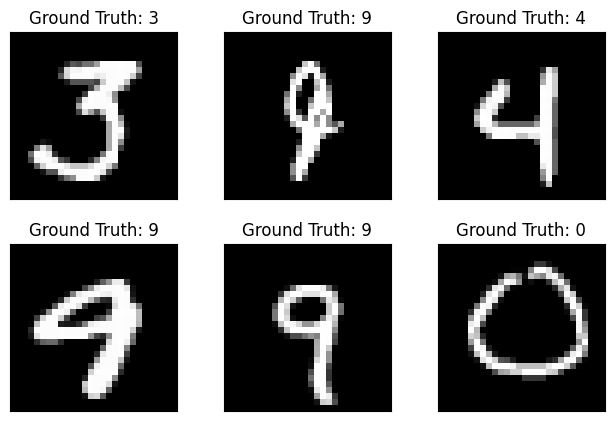

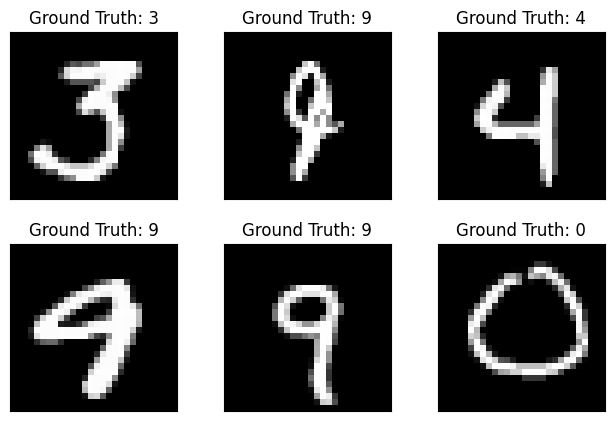

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6): # This loop iterates over the first 6 images in your batch. You're going to display these 6 images.
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    # it should display the image exactly as it is, without any smoothing or interpolation between pixel values.
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Importing Libraries:

In [30]:
import torch.nn as nn
import torch.nn.functional as F # it contains necessary activation function.
import torch.optim as optim # importing optimizer.

## Creating Class Of Model:
- ***self.conv1 = nn.Conv2d(1, 10, kernel_size=5):*** This line defines the first convolutional layer. It takes input images with one channel (grayscale) and applies 10 filters (also known as kernels) with a kernel size of 5x5. This layer is responsible for learning local patterns and features in the input images.
- ***self.conv2 = nn.Conv2d(10, 20, kernel_size=5):*** This line defines the second convolutional layer. It takes the output of the first convolutional layer (which has 10 channels) and applies 20 filters with a kernel size of 5x5. This layer further extracts higher-level features from the input.
- ***self.conv2_drop = nn.Dropout2d():*** This line defines a 2D dropout layer. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of the input units to zero during each forward pass.
- ***self.fc1 = nn.Linear(320, 50):*** This line defines a fully connected (dense) layer with 320 input features and 50 output features. The 320 input features come from the output of the second convolutional layer (20 channels of 4x4 spatial dimensions).

In [31]:
class Net(nn.Module): # nn.Module as a base class.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
# "10 channels" refers to the ten output feature maps or channels produced by the first convolutional layer, each capturing different learned features.
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50) # It is used to capture global patterns in the data.
        self.fc2 = nn.Linear(50, 10) # It is typical used for a classification task with 10 classes (e.g., digits 0-9).

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
#self.conv1(x)applies the first convolutional layer conv1 to the input x. This operation extracts features from the input using the learned convolutional filters.
#performs 2x2 max-pooling on the output of the first convolutional layer.
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
# Dropout is used to avoid overfitting. This line is similar to the first one but applied to the output of the second convolutional.
        x = x.view(-1, 320) # the data is reshaped using view
#-1 is used as a placeholder for the batch size, and 320 represents the number of features produced by the convolutional layers and pooling.
        x = F.relu(self.fc1(x)) # This line applies a fully connected (dense) layer fc1 to the flattened x.
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

# This extracts all the learnable parameters (weights and biases) from network.


In [32]:
network= Net()
#  creates an instance of our neural network model.
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
#  Momentum is a technique used to accelerate training convergence.
#It helps the optimizer "remember" previous gradients and use them to guide the parameter updates.

## Keeping Track of Training and Testing Losses and the Number of Training Iterations.

In [33]:
train_losses = [] # empty list called train_losses to store the training loss values during the training process.
# We append the value of the loss after each training iteration or epoch to this list.
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
# these lists and counters help you visualize the training and validation loss trends over time,
# It can be crucial for understanding how well your model is learning and whether it might be overfitting or underfitting.

## Training a Neural Network Using the Training Data:
- ***for batch_idx, (data, target) in enumerate(train_loader):*** This loop iterates over batches of training data using the train_loader. Each iteration processes a batch of data and its corresponding target labels.
- ***loss = F.nll_loss(output, target):*** This calculates the loss between the predicted output and the target labels using the negative log-likelihood loss (NLL loss). The output contains the model's predictions, and target contains the ground truth labels.
- ***if batch_idx % log_interval == 0:*** This condition checks whether a specified number of batches have been processed (log_interval) and, if so, prints training progress. This can help you monitor the training process at regular intervals.

In [34]:
def train(epoch):
  network.train() # It ensures that all layers operate in the training mode.
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad() # avoids accumulating gradients from previous batches.
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward() #These gradients are used to update the model's weights during optimization.This helps in back propagation.
    optimizer.step() #  It updates the model's weights according to the optimization algorithm
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
# This appends the current batch's loss value to the train_losses list, which keeps track of the training loss over time.
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
# This appends the training iteration count to the train_counter list. It helps keep track of the total number of training iterations across all epochs.
      torch.save(network.state_dict(),'model.pth') #These lines save the state of the model. This line defines path of the model.
      torch.save(optimizer.state_dict(),'optimizer.pth')

## Testing a Neural Network Using the Training Data:
- ***max(1, keepdim=True)*** is used to find the maximum value along the second dimension (axis 1) of the output tensor for each sample in the batch. This operation identifies the class with the highest predicted probability for each sample. The keepdim=True argument ensures that the result retains the same number of dimensions as the original tensor, so it remains a 2D tensor.
- ***correct += pred.eq(target.data.view_as(pred)).sum():*** This line compares the predicted labels (pred) with the target labels (target) and counts the number of correct predictions. It uses .eq() to perform element-wise equality checks and .sum() to count the correct predictions.

In [35]:
def test():
  network.eval() # This line sets the neural network (network) in evaluation mode.
  test_loss = 0 # To keep track of the total loss.
  correct = 0 # This variable correct will be used to count the number of correctly predicted samples.
  with torch.no_grad(): # we don't need gradients for the testing phase, and it can save memory.
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
# Above line is used to compute loss between actual and predicted values using nll function.
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

# Importing Path to Ensure Existence of Directory:

In [36]:
from pathlib import Path
Path('/results').mkdir(parents=True, exist_ok=True)
# This is often used to ensure that a specific directory exists before writing or saving files to it.

# Testing the Performance or Accuracy of Trained Model:

In [37]:
# test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()
# First, it evaluates the initial performance of the model on the test dataset.
# Then, it enters a loop over a specified number of training epochs.
# Inside the loop, it trains the model for one epoch and evaluates it on the test dataset after each epoch.

<ipython-input-31-11d8139890e9>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319280
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.290954
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.318535
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.261000
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.259137
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.229576
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.196151
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.181698
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.088444
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.014765
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.818533
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.822772
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.838733
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.530556
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.738141
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.420971
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.369238
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.335397
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.182360
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.056649
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1911, Accuracy: 9439/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.670451
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.447680
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.243822
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.460134
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.429018
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.728216
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.496746
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.653084
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.483002
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.528041
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.432826
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.353927
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.409941
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.414795
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.373416
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.596391
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.513890
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.347761
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.302566
Train Epoch: 2 [12160

# Plotting Graph to Check Loss during Training:

ValueError: ignored

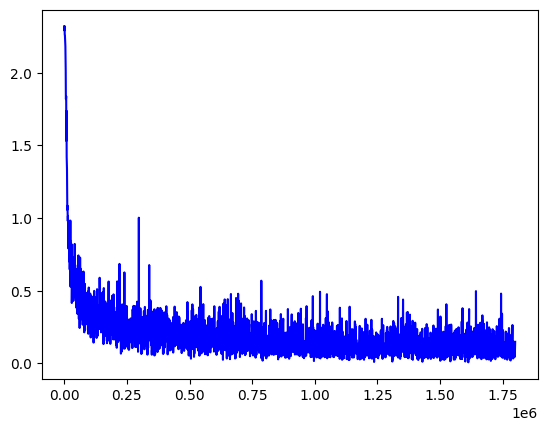

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Applying Neural Network Model to Input Data and Produce Output:

In [39]:
with torch.no_grad():
  output = network(example_data)

<ipython-input-31-11d8139890e9>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


# Plotting The Predicted Data:

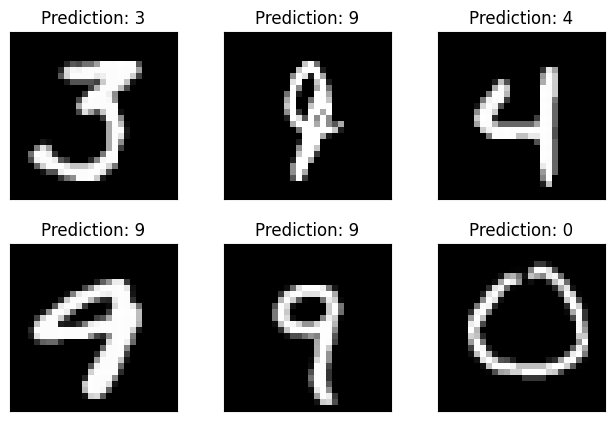

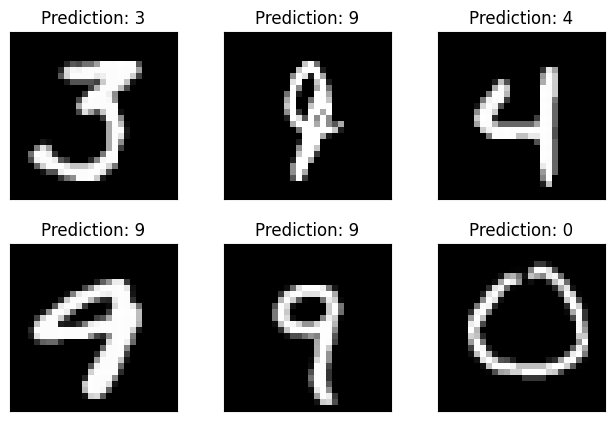

In [40]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

# Loading the Model:

In [42]:
# Loading the model
network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

# Importing Libraries of Pytorch:

In [43]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data

# Defining the Device (CPU or GPU):

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Data Transformations for the test dataset (similar to training transformations):

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    # Add other transformations as needed
])

# Defining the Test Dataset:



In [46]:
test_dataset = datasets.MNIST(root='path_to_test_data', train=False, transform=transform, download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 255179996.22it/s]


Extracting path_to_test_data/MNIST/raw/train-images-idx3-ubyte.gz to path_to_test_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71508674.04it/s]


Extracting path_to_test_data/MNIST/raw/train-labels-idx1-ubyte.gz to path_to_test_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68680894.94it/s]

Extracting path_to_test_data/MNIST/raw/t10k-images-idx3-ubyte.gz to path_to_test_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5565448.08it/s]

Extracting path_to_test_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to path_to_test_data/MNIST/raw



# Creating a DataLoader for the Test Dataset:

In [47]:
batch_size = 64  # Specify your desired batch size
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Loading our Pre-trained Model:

In [48]:
model = Net()  # Replace with your model class
model.load_state_dict(torch.load('model.pth'))
model.to(device)  # Move the model to the specified device
model.eval()  # Set the model to evaluation model

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

# Initializing Variables for Accuracy Calculation:

In [49]:
correct = 0
total = 0

# Iterating it Through Test Dataset:

In [50]:
# Iterate through the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)  # Move data to the device
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

<ipython-input-31-11d8139890e9>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


# Calculation and Display of Accuracy:

In [51]:
accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Accuracy on the test dataset: 98.45%


# Confusion Matrix:

# Importing Sklearn Library:

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [53]:
test_losses = []  # Initialize test_losses list
test_loss = 0  # Initialize test_loss here
correct = 0 # This variable is likely used to keep track of the number of correct predictions made by your model during evaluation.
all_preds = []
all_labels = []

# Defining Test:

In [54]:
def test():
    global test_loss, correct, all_preds, all_labels  # Use global to access variables from the global scope
    test_loss = 0  # Reset test_loss
    correct = 0
    all_preds = []
    all_labels = []
# This list is intended to store the ground truth labels corresponding to the data points for which you are making predictions during evaluation.

# Evaluating Neural Network on Test Dataset:

In [55]:
with torch.no_grad():
    for data, target in test_loader:
         output = network(data)
         test_loss = F.nll_loss(output, target, reduction='sum').item()  # Use 'reduction' instead of 'size_average'
         pred = output.data.max(1, keepdim=True)[1]
         correct = pred.eq(target.data.view_as(pred)).sum()

         all_preds.extend(pred.cpu().numpy())
         all_labels.extend(target.cpu().numpy())
test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)


<ipython-input-31-11d8139890e9>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


# Calculation of Confusion Matrix And Classification Report:

In [59]:
# Calculate the confusion matrix and classification report
confusion = confusion_matrix(all_labels, all_preds)
classification_rep = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])

# Creating Confusion Matrix:

In [57]:
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")

Confusion Matrix:
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1133    0    0    0    1    0    0    1    0]
 [   4    5  992    1    3    0    1   18    8    0]
 [   0    1    0  987    0   12    0    6    3    1]
 [   0    0    1    0  964    0    3    0    0   14]
 [   3    0    0    1    0  881    1    1    3    2]
 [   7    2    0    0    3    4  938    0    4    0]
 [   0    5    2    0    0    0    0 1018    1    2]
 [   4    1    1    0    1    1    1    2  960    3]
 [   1    3    0    1    2    3    0    6    3  990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.96      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99     

# Creating Classification Report:

In [58]:
print("\nClassification Report:")
print(classification_rep)




Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.96      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Importing Libraries for Plotting Of Confusion Matrix:

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculation and Plotting Of Confusion Matrix:

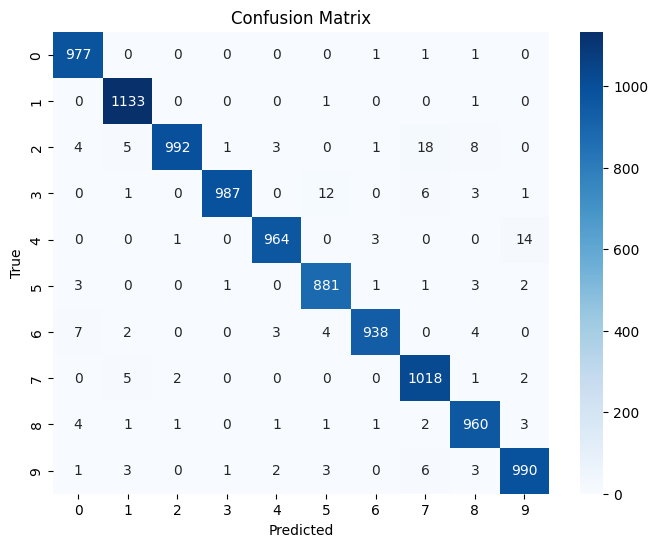

In [62]:

# Calculate the confusion matrix (you should have this variable from your code)
confusion = confusion_matrix(all_labels, all_preds)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
